In [1]:
import scipy.optimize as optimize
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
m=15
n=25
c=10

Revenue and cost functions

In [3]:
def f(A,alpha,eps_1,x):
    return A/alpha*(x+eps_1)**alpha-A/alpha*eps_1**alpha
def g(B,beta,eps_2,y):
    return B/beta*(y+eps_2)**beta-B/beta*eps_2**beta

Division reactions

In [4]:
def x_tilde(A,alpha,eps_1,lam):
    if lam>=A/eps_1**(1-alpha):
        return 0
    elif lam<=A/(c+eps_1)**(1-alpha):
        return c
    else:
        return (A/lam)**(1/(1-alpha))-eps_1
def y_tilde(B,beta,eps_2,lam):
    if lam<=B*eps_2**(beta-1):
        return 0
    elif lam>=B*(c+eps_2)**(beta-1):
        return c
    else:
        return (lam/B)**(1/(beta-1))-eps_2

The algorithm

In [5]:
T=500
L=0
L_sqr=0
lam=0
lam_all=[]
z=np.zeros(T)
np.random.seed(42)
for t in range(T):
    
    # sample model parameters
    A=np.random.uniform(0,15,m)
    B=np.random.uniform(0,10,n)
    eps_1=0.1+np.random.uniform(0,1,m)
    eps_2=0.1+np.random.uniform(0,1,n)
    alpha=1-np.random.uniform(0,1,m)
    beta=1+np.random.uniform(0,3,n)
    
    x=0
    for i in range(m):
        x+=x_tilde(A[i],alpha[i],eps_1[i],lam)

    y=0
    for i in range(n):
        y+=y_tilde(B[i],beta[i],eps_2[i],lam) 
        
    L+=y-x
    L_sqr+=(y-x)**2
    lam=-L/np.sqrt(L_sqr)
    lam_all.append(lam)
    z[t]=y-x

Text(0.5, 1.0, 'Difference between supply and demand')

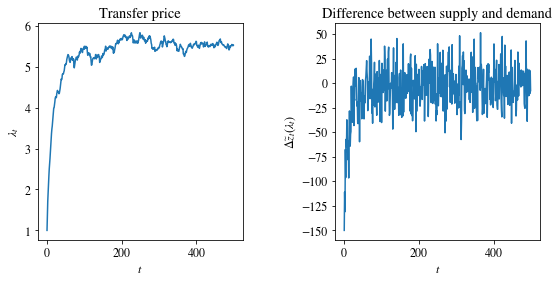

In [6]:
mpl.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(9,4))
fig.subplots_adjust(wspace=0.45)
axes[0].plot(lam_all)
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('$\lambda_t$')
axes[0].set_title('Transfer price')
axes[1].plot(z)
axes[1].set_xlabel('$t$')
axes[1].set_ylabel('$\Delta \widetilde z_t(\lambda_t)$')
axes[1].set_title('Difference between supply and demand')

In [7]:
fig.savefig('1_commodity_dynamic.eps', dpi=600, bbox_inches='tight')